# Machine Learning Model

In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

### 1. Clean & Prepare Dataset

In [2]:
# Read csv into dataframe
df = pd.read_csv(os.path.join("Resources", "customer_data.csv"))
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
# Check for null values
for x in df:
    print(f' Column {x}: Unique Value(s): {pd.isna(df[x]).unique()}') 

 Column id: Unique Value(s): [False]
 Column Gender: Unique Value(s): [False]
 Column Age: Unique Value(s): [False]
 Column Driving_License: Unique Value(s): [False]
 Column Region_Code: Unique Value(s): [False]
 Column Previously_Insured: Unique Value(s): [False]
 Column Vehicle_Age: Unique Value(s): [False]
 Column Vehicle_Damage: Unique Value(s): [False]
 Column Annual_Premium: Unique Value(s): [False]
 Column Policy_Sales_Channel: Unique Value(s): [False]
 Column Vintage: Unique Value(s): [False]
 Column Response: Unique Value(s): [False]


In [4]:
# Drop id column because it is not a customer's attribute
df = df.drop(columns=['id'])
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
# Check data types
df.dtypes

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [6]:
# Convert objects in Gender column into numeric values
df['Gender'] = df['Gender'].replace('Male', 1)
df['Gender'] = df['Gender'].replace('Female', 0)

In [7]:
# Convert objects in Vehicle Age column into numeric values
df['Vehicle_Age'] = df['Vehicle_Age'].replace('< 1 Year', 1)
df['Vehicle_Age'] = df['Vehicle_Age'].replace('1-2 Year', 2)
df['Vehicle_Age'] = df['Vehicle_Age'].replace('> 2 Years', 3)

In [8]:
# Convert objects in Vehicle Damage column into numeric values
df['Vehicle_Damage'] = df['Vehicle_Damage'].replace('Yes', 1)
df['Vehicle_Damage'] = df['Vehicle_Damage'].replace('No', 0)

In [9]:
# Check data types again to ensure all objects are converted
df.dtypes

Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [10]:
# View df
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,3,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,2,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,3,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


### 2. Run K Nearest Neighborbors Algorithm

In [11]:
y = df['Response']

In [12]:
X = df.drop('Response', axis=1)
X.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,44,1,28.0,0,3,1,40454.0,26.0,217
1,1,76,1,3.0,0,2,0,33536.0,26.0,183
2,1,47,1,28.0,0,3,1,38294.0,26.0,27
3,1,21,1,11.0,1,1,0,28619.0,152.0,203
4,0,29,1,41.0,1,1,0,27496.0,152.0,39


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [60]:
# Loop through different k values to see which has the highest accuracy - UNSCALED DATA
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.798
k: 3, Train/Test Score: 0.900/0.840
k: 5, Train/Test Score: 0.886/0.858
k: 7, Train/Test Score: 0.881/0.866
k: 9, Train/Test Score: 0.879/0.870
k: 11, Train/Test Score: 0.879/0.873
k: 13, Train/Test Score: 0.878/0.874
k: 15, Train/Test Score: 0.878/0.875
k: 17, Train/Test Score: 0.878/0.876
k: 19, Train/Test Score: 0.878/0.876
k: 21, Train/Test Score: 0.878/0.876
k: 23, Train/Test Score: 0.878/0.876
k: 25, Train/Test Score: 0.878/0.876
k: 27, Train/Test Score: 0.878/0.876
k: 29, Train/Test Score: 0.878/0.876
k: 31, Train/Test Score: 0.878/0.877
k: 33, Train/Test Score: 0.878/0.876
k: 35, Train/Test Score: 0.878/0.876
k: 37, Train/Test Score: 0.878/0.876
k: 39, Train/Test Score: 0.878/0.877
k: 41, Train/Test Score: 0.878/0.877
k: 43, Train/Test Score: 0.878/0.877
k: 45, Train/Test Score: 0.878/0.877
k: 47, Train/Test Score: 0.878/0.877
k: 49, Train/Test Score: 0.878/0.877


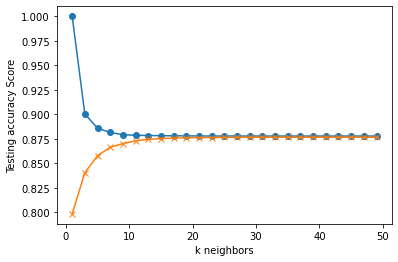

In [15]:
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [14]:
# k = 17
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
print('k=17 Test Acc: %.3f' % knn.score(X_test, y_test))

k=17 Test Acc: 0.876


Cross check accurancy using the square root method

In [17]:
# # K using square root method i.e. 381110^(1/2)
# knn = KNeighborsClassifier(n_neighbors=617)
# knn.fit(X_train_scaled, y_train)
# print('k=617 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=617 Test Acc: 0.877


Conclusion: Accuracy level is almost the same whether using 17 or 617 as k. Therefore, 17 is selected so that the model can be run more efficiently, while maintaining an acceptable level of accuracy.

In [15]:
# Use KNN model to predict responses
predictions = knn.predict(X_test)
print(f'First 10 predictions: {predictions[:10]}')
print(f'First 10 actual responses: {y_test[:10].tolist()}')

First 10 predictions: [0 0 0 0 0 0 0 0 0 0]
First 10 actual responses: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [18]:
# Create dataframe to compare predictions & actual responses
predict_df = pd.DataFrame({'Predictions': predictions, 'Actual': y_test}).reset_index(drop=True)
predict_df

,Predictions,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95273,0,0
95274,0,0
95275,0,0
95276,0,0


In [19]:
# Check if we have predicted any 'positive' response
check = predict_df[predict_df['Predictions'] == 1]
check

,Predictions,Actual
890,1,0
980,1,0
1225,1,0
1374,1,0
1524,1,0
...,...,...
94165,1,0
94207,1,0
94283,1,0
94907,1,0


In [20]:
# Check how many times we have correctly predicted the responses
correct_predict = predict_df[predict_df['Predictions'] == predict_df['Actual']]
correct_predict.count()

Predictions    83425
Actual         83425
dtype: int64

In [21]:
print(f'Percentage of correct predictions: {correct_predict.count()/predict_df.count()}')

Percentage of correct predictions: Predictions    0.875596
Actual         0.875596
dtype: float64


In [32]:
# Check where we have correctly predicted the positive responses
correct_positive = predict_df.loc[(predict_df['Predictions'] == predict_df['Actual']) & (predict_df['Predictions'] == 1)]
correct_positive

,Predictions,Actual
6013,1,1
7056,1,1
13300,1,1
15192,1,1
17196,1,1
18919,1,1
22571,1,1
22799,1,1
22847,1,1
26230,1,1


### 3. Save the Trained Model

In [58]:
import joblib
  
# Save the model as a pickle in a file 
joblib.dump(knn, 'recommender_model.pkl') 

['recommender_model.pkl']

In [59]:
# Load the model from the file 
knn_from_joblib = joblib.load('recommender_model.pkl')  
  
# Use the loaded model to make predictions 
knn_from_joblib.predict(X_test) 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)